# BBM409 Assignment_0

Group Member: Hanifi Aslankarayiğit

Group Member: Mustafa Emre Yıldırım

In [41]:
""" import necessary libraries"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Mounted at /content/drive


In [4]:
""" upload dataset from your PC, you can use different methods"""
#from google.colab import files
#data = files.upload()
df = pd.read_csv('star_classification.csv')
df.head(20)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


## Pre-processing

In [42]:
#X= df.iloc[:,:-5].values
#X= df[['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID']]
#X = df.drop(columns=['class'])
X = df[['obj_ID','alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']]#We can minimize runtime by minimizing the number of unique features we choose.
#X= df.drop(['class'],axis=1)
#X= df.iloc[:,:2].values
#X= df[['run_ID','spec_obj_ID']]
#y= df.iloc[:,13].values
y=df['class']
#y=df['class']

Explain why you use those methods, etc.

## Split the dataset

80% training & 20% test  or 5-fold cross validation

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#The purpose of this code is to standardize or normalize your features, making them have similar scales and
#ensuring that your machine learning model is not influenced by the different units or magnitudes of the input features.

## Classification Methods

In this homework, we use kNN, Naive Bayes ...

### kNN

In [45]:
# import KNeighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
#n_neighbors determines the number of nearest neighbors to consider when making a classification decision. In this case, the KNN classifier will consider the 5 nearest neighbors.
classifier.fit(X_train,y_train)#KNN classifier uses the training data to "learn" patterns and relationships between the features and the corresponding labels. It effectively memorizes the training data


KNeighborsClassifier()

In [46]:
y_pred = classifier.predict(X_test)
#It is used to make predictions on a set of unseen data points using the trained KNN classifier.

Explain your results, draw plots, tables etc.

In [47]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)



              precision    recall  f1-score   support

      GALAXY       0.94      0.96      0.95     11831
         QSO       0.96      0.89      0.92      3799
        STAR       0.92      0.93      0.92      4370

    accuracy                           0.94     20000
   macro avg       0.94      0.92      0.93     20000
weighted avg       0.94      0.94      0.94     20000

[[11350   129   352]
 [  422  3365    12]
 [  317     1  4052]]


### Weighted KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
#n_neighbors determines the number of nearest neighbors to consider when making a classification decision. In this case, the KNN classifier will consider the 5 nearest neighbors.
classifier.fit(X_train,y_train)#KNN classifier uses the training data to "learn" patterns and relationships between the features and the corresponding labels. It effectively memorizes the training data

KNeighborsClassifier(weights='distance')

In [49]:
y_pred = classifier.predict(X_test)
#It is used to make predictions on a set of unseen data points using the trained KNN classifier.
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.94      0.96      0.95     11831
         QSO       0.96      0.89      0.92      3799
        STAR       0.92      0.93      0.93      4370

    accuracy                           0.94     20000
   macro avg       0.94      0.93      0.93     20000
weighted avg       0.94      0.94      0.94     20000

[[11345   138   348]
 [  422  3367    10]
 [  291     0  4079]]


### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes is a probabilistic classifier based on the Bayes' theorem, which is commonly used for classification tasks.
clf=GaussianNB()
#This line initializes an instance of the Gaussian Naive Bayes classifier and assigns it to the variable clf. This clf object will be used to train and make predictions with the Gaussian Naive Bayes model.
clf.fit(X_train,y_train)
#This line trains the Gaussian Naive Bayes classifier using the provided training data.
#When you call clf.fit(X_train, y_train), the Gaussian Naive Bayes classifier estimates the statistical parameters (mean and variance) of each feature for each class in the training data.
#It assumes that the features are normally distributed within each class (hence "Gaussian"), and it uses this information to calculate the likelihood of observing a specific combination of features for each class.
#It also estimates the prior probabilities of each class.

GaussianNB()

In [51]:
y_pred=clf.predict(X_test)
#It is used to make predictions on a set of unseen data points using the trained Naive bayes classification
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

              precision    recall  f1-score   support

      GALAXY       0.75      0.92      0.83     11831
         QSO       0.68      0.89      0.77      3799
        STAR       0.99      0.14      0.25      4370

    accuracy                           0.74     20000
   macro avg       0.81      0.65      0.62     20000
weighted avg       0.79      0.74      0.69     20000

[[10869   956     6]
 [  432  3367     0]
 [ 3111   628   631]]


### Random Forest


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#The RandomForestClassifier is an ensemble learning method based on decision trees, which is used for classification tasks.
rforest = RandomForestClassifier()
#Random Forest algorithm creates a collection of decision trees, where each tree is trained on a bootstrapped subset of the training data (bagging) and selects a random subset of features to split on (feature bagging).
#The ensemble of decision trees works together to make predictions.
rforest.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rf_predictions = rforest.predict(X_test)
#It is used to make predictions on a set of unseen data points using the trained Random Forest classification
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))
cm=confusion_matrix(y_test,y_pred)
print(cm)

Classification Report for Random Forest:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11831
         QSO       0.96      0.93      0.95      3799
        STAR       1.00      1.00      1.00      4370

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000

[[10869   956     6]
 [  432  3367     0]
 [ 3111   628   631]]


###Svm

In [55]:
from sklearn.svm import SVC

In [56]:
svm_model = SVC()
#The SVC class stands for Support Vector Classification and is used for binary and multi-class classification tasks.
#The SVM algorithm uses this information to learn a decision boundary that separates different classes.
svm_model.fit(X_train,y_train)
svm_predictions = svm_model.predict(X_test)
#It is used to make predictions on a set of unseen data points using the trained SVM classification
print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))
cm=confusion_matrix(y_test,y_pred)
print(cm)

Classification Report for SVM:
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11831
         QSO       0.96      0.89      0.93      3799
        STAR       0.94      1.00      0.97      4370

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000

[[10869   956     6]
 [  432  3367     0]
 [ 3111   628   631]]


###Explain your results, draw plots, tables etc.

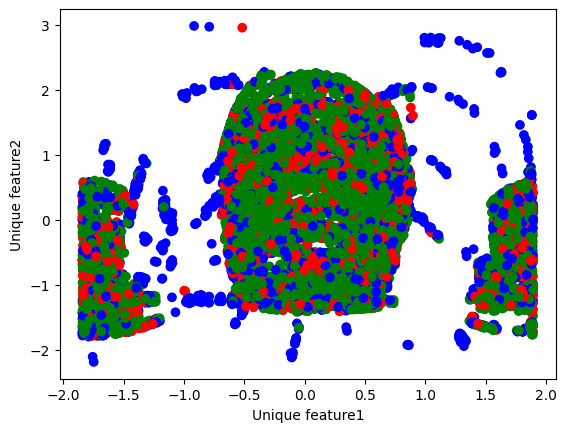

In [70]:
colors = {'QSO': 'r', 'GALAXY': 'g', 'STAR': 'b'}
color_labels = [colors[label] for label in y_test]

plt.scatter(X_test[:, 1], X_test[:, 2], c=color_labels)
plt.xlabel("Unique feature1")
plt.ylabel("Unique feature2")

plt.show()

We can prefer knn or naive bayes instead of svm and random forest in classifying and predicting larger data. The reason for this is that svm and random forest algorithms run slower on big data.
Confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives, which can help you understand where the model is making errors.